# Radiative effects

In [12]:
%reset -f

import ROOT

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetGridColor(16)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)
ROOT.gStyle.SetPadRightMargin(0)
ROOT.gStyle.SetPadBottomMargin(0.12)
ROOT.gStyle.SetPadLeftMargin(0.07)
ROOT.gStyle.SetTitleOffset(0.7, 'Y')
ROOT.gStyle.SetTitleSize(0.06,'T')
ROOT.gStyle.SetTitleSize(0.05,'xy')
ROOT.gStyle.SetLabelSize(0.043,'xy')

ROOT.TH1.AddDirectory(0)

%run -i eppi0_columns.py
%run -i eppi0_binning_scheme_v3.py

rdfs = []
for fname in ['data/lvl2_eppi0.inb.mc.aaorad.smear.root']:
    df = ROOT.RDataFrame("h22", fname)
    df = define_eppi0_columns_using_proton(df)
    if 'mc' in fname:
        df = df.Define("ihel","1")
    df = define_eppi0_bins(df, fname)
    df = process_eppi0_bins(df, fname)
    df = df.Filter("abs(dpt)<0.3 && abs(dphi)<4 && dpz>-0.5 && dpz<0.9")
    #df = df.Filter("abs(dpx)<0.3 && abs(dpy)<0.3 && abs(dphi)<4 && dpz>-0.5 && dpz<0.9 && mm2>-0.3 && mm2<0.4")
    df = df.Filter("&&".join(f"(((int)status)&(1<<{i}))" for i in [gloosest,prodc]))
    df = df.Filter("thp<44.106+-6.625*pp+1.438*pp*pp")

    df = df.Define("pg", "array<double,2>{pg1,pg2}")
    df = df.Define("thg", "array<double,2>{thg1,thg2}")
    df = df.Define("fig", "array<double,2>{fig1,fig2}")
    df = df.Define("gvals", """
    double Mpi0 = 0.135;
    auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6,0);
    auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);
    auto ele0 = ROOT::Math::PxPyPzMVector(ex0,ey0,ez0,0);
    auto pro0 = ROOT::Math::PxPyPzMVector(px0,py0,pz0,0.938);
    auto grad = ROOT::Math::PxPyPzMVector(gx0,gy0,gz0,0);
    auto V = targ-ele0-pro0;
    
    double e0 = (Mpi0*Mpi0 - V.M2())/(V.E() - V.Z())/2;
    auto beam0 = ROOT::Math::PxPyPzMVector(0,0,e0,0);
    
    double q0 = -(beam0-ele0).M2();
    double q1 = -(beam-ele0).M2();
    
    double mm0 = (beam+targ-ele0-pro0).M2();
    double mm1 = (beam+targ-grad-ele0-pro0).M2();
    
    return vector<double> {e0, q0,q2,mm0,mm1};
    """)
    
    df = df.Define("e0","gvals[0]")
    df = df.Define("q0","gvals[1]")
    df = df.Define("q1","gvals[2]")
    df = df.Define("mm0","gvals[3]")
    df = df.Define("mm1","gvals[4]")
    rdfs.append(df)
    

In [13]:
hmm2s = [df.Histo1D(("hmm2","MM^{2}_{epX};MM^{2} [GeV^{2}]",200,0,0.3), "mm0") for df in rdfs]

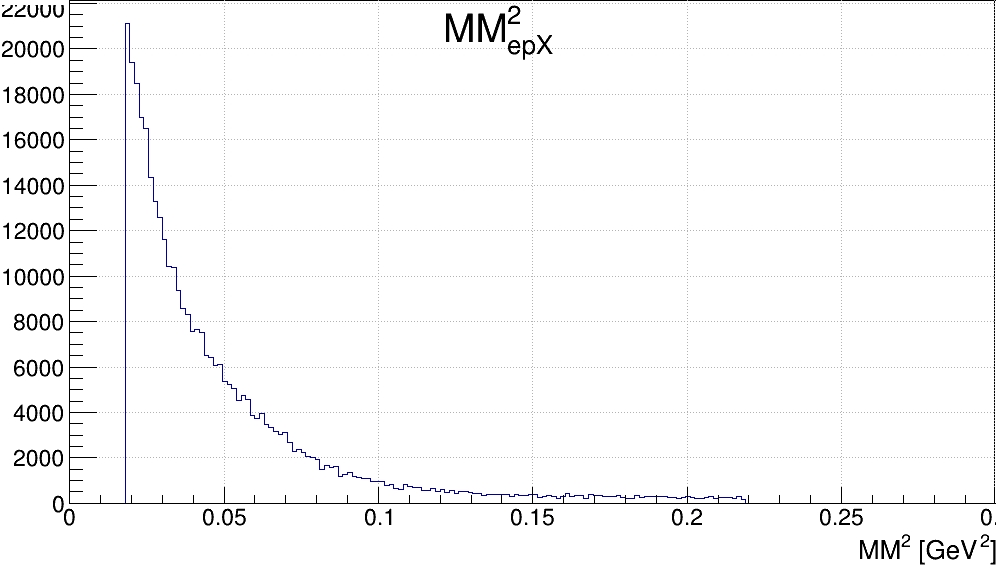

In [14]:
c1 = ROOT.TCanvas("c1","c1",1000,600)
c1.SetTopMargin(0)
c1.SetRightMargin(0)

c1.Draw()

h1 = hmm2s[0]
h1.Draw()

c1.Print("pdf/aaorad.mm2.pdf")

________________________________
________________________________
________________________________

# Radiative effects (in dev)

In [20]:
%reset -f

import ROOT

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetGridColor(16)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)
ROOT.gStyle.SetPadRightMargin(0)
ROOT.gStyle.SetPadBottomMargin(0.12)
ROOT.gStyle.SetPadLeftMargin(0.07)
ROOT.gStyle.SetTitleOffset(0.7, 'Y')
ROOT.gStyle.SetTitleSize(0.06,'T')
ROOT.gStyle.SetTitleSize(0.05,'xy')
ROOT.gStyle.SetLabelSize(0.043,'xy')

ROOT.TH1.AddDirectory(0)

%run -i eppi0_columns.py
%run -i eppi0_binning_scheme_v3.py

rdfs = []
for fname in ['data/lvl2_eppi0.inb.mc.aaorad.smear.root']:
    df = ROOT.RDataFrame("h22", fname)
    df = define_eppi0_columns_using_proton(df)
    if 'mc' in fname:
        df = df.Define("ihel","1")
    df = define_eppi0_bins(df, fname)
    df = process_eppi0_bins(df, fname)
    df = df.Filter("abs(dpt)<0.3 && abs(dphi)<4 && dpz>-0.5 && dpz<0.9")
    #df = df.Filter("abs(dpx)<0.3 && abs(dpy)<0.3 && abs(dphi)<4 && dpz>-0.5 && dpz<0.9 && mm2>-0.3 && mm2<0.4")
    df = df.Filter("&&".join(f"(((int)status)&(1<<{i}))" for i in [gloosest,prodc]))
    df = df.Filter("thp<44.106+-6.625*pp+1.438*pp*pp")
    df = df.Filter("sqrt(gx0*gx0 + gy0*gy0 + gz0*gz0)>0.0001")

    df = df.Define("pg", "array<double,2>{pg1,pg2}")
    df = df.Define("thg", "array<double,2>{thg1,thg2}")
    df = df.Define("fig", "array<double,2>{fig1,fig2}")
    df = df.Define("gvals", """
    double Mpi0 = 0.135;
    auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6,0);
    auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);
    auto ele0 = ROOT::Math::PxPyPzMVector(ex0,ey0,ez0,0);
    auto pro0 = ROOT::Math::PxPyPzMVector(px0,py0,pz0,0.938);
    auto grad = ROOT::Math::PxPyPzMVector(gx0,gy0,gz0,0);
    auto V = targ-ele0-pro0;
    
    double e0 = (Mpi0*Mpi0 - V.M2())/(V.E() - V.Z())/2;
    auto beam0 = ROOT::Math::PxPyPzMVector(0,0,e0,0);
    
    double q0 = -(beam0-ele0).M2();
    double q1 = -(beam-ele0).M2();
    
    double mm0 = (beam+targ-grad-ele0-pro0).M2();
    double mm1 = (beam+targ-grad-ele0-pro0).M2();
    
    return vector<double> {e0, q0,q2,mm0,mm1};
    """)
    
    df = df.Define("e0","gvals[0]")
    df = df.Define("q0","gvals[1]")
    df = df.Define("q1","gvals[2]")
    df = df.Define("mm0","gvals[3]")
    df = df.Define("mm1","gvals[4]")
    rdfs.append(df)
    

In [21]:
hmm2s = [df.Histo1D(("hmm2","MM^{2}_{epX};MM^{2} [GeV^{2}]",200,0,0.3), "mm0") for df in rdfs]

0.018857420947821356


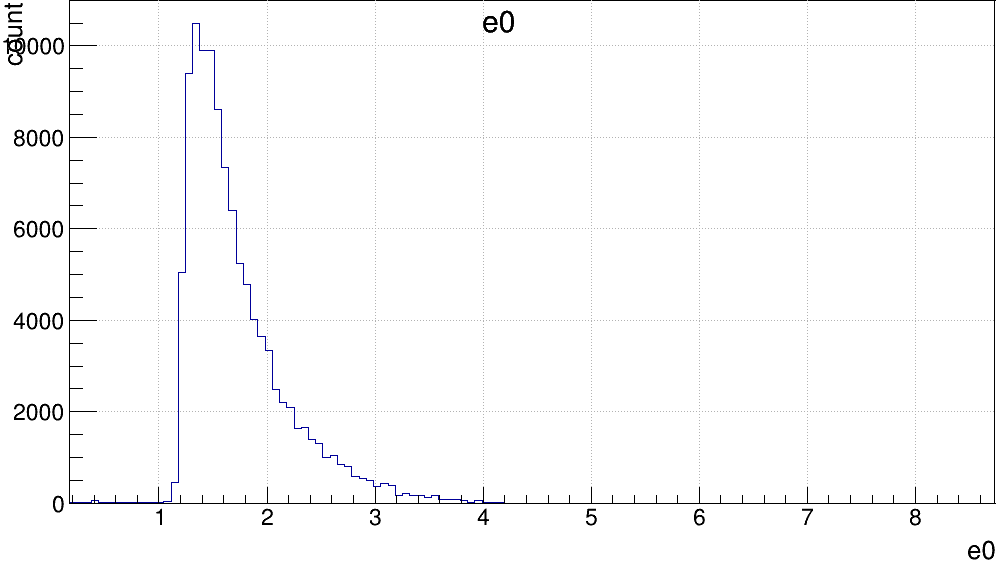

In [22]:
c1 = ROOT.TCanvas("c1","c1",1000,600)
c1.SetTopMargin(0)
c1.SetRightMargin(0)

c1.Draw()

h1 = hmm2s[0]
h1.Draw()
print(h1.GetMean())

he0 = rdfs[0].Histo1D("e0")
he0.Draw()

